In [ ]:
# LOAD THE TAJIMA'S D VALUES FOR BOTH SCENARIOS
control<-read.csv('../data/SingleSite/Tajimas_D_control.csv', header=T)
dim(control)
treatment<-read.csv('../data/SingleSite/Tajimas_D_decline.csv', header=T)
dim(treatment)
#names(control)

[1] 1000   27

[1] 1000   27

## Power curves of different pre-crash time

In [3]:
power<-function(t1=39, t2=18)
{
    colname1<-paste(c('X', t1), collapse='')
    colname2<-paste(c('X', t2), collapse='')
    D_control<-control[,colname1]-control[,colname2]
    D_treatment<-treatment[,colname1]-treatment[,colname2] # NETAGIVE
    mean(D_treatment<quantile(D_control, 0.05))
}

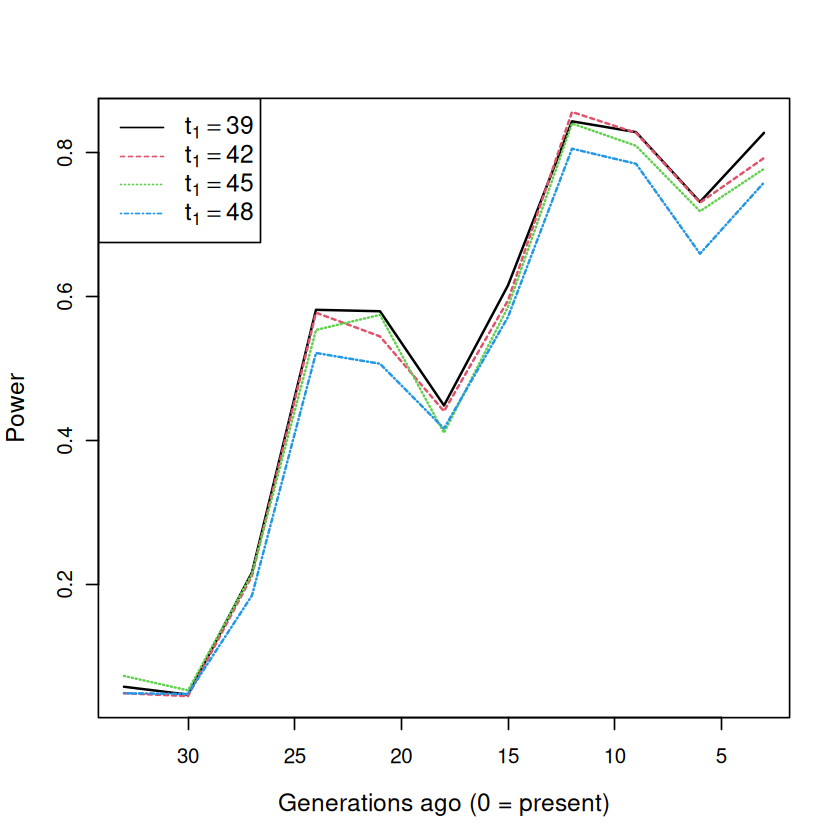

In [29]:
# A FUNCTION TO CALCULATE POWER
power<-function(t1=39, t2=33)
{
    colname1<-paste(c('X', t1), collapse='')
    colname2<-paste(c('X', t2), collapse='')
    D_control<-control[,colname1]-control[,colname2] # SHOULD HAVE ZERO MEAN
    D_treatment<-treatment[,colname1]-treatment[,colname2] # NETAGIVE
    mean(D_treatment<quantile(D_control, 0.05))
}
# FOUR DIFFERENT REFERENCE POINTS
t<-seq(33, 3, -3)
result_39<-rep(NA, length(t))
result_42<-rep(NA, length(t))
result_45<-rep(NA, length(t))
result_48<-rep(NA, length(t))
for (i in 1:length(t))
{
    result_39[i]<-power(t1=39, t2=t[i])
    result_42[i]<-power(t1=42, t2=t[i])
    result_45[i]<-power(t1=45, t2=t[i])
    result_48[i]<-power(t1=48, t2=t[i])
}
# PLOT
plot(t, result_39, type='l', xlim=rev(range(t)), xlab='Generations ago (0 = present)', ylab='Power', 
    cex.lab=1.2, lwd=1.5)
lines(t, result_42, col=2, lty=2, lwd=1.5)
lines(t, result_45, col=3, lty=3, lwd=1.5)
lines(t, result_48, col=4, lty=4, lwd=1.5)
legend("topleft",
       legend = c(expression(t[1] == 39),
                  expression(t[1] == 42),
                  expression(t[1] == 45),
                  expression(t[1] == 48)),
       col = 1:4, lty = 1:4, cex=1.2)


In [ ]:
# SAVE AS PDF
pdf("../outputs/combined_plots/power_season.pdf", width = 7, height = 7)

plot(t, result_39, type='l', xlim=rev(range(t)), xlab='Generations ago (0 = present)', 
     ylab='Power', cex.lab=1.2, lwd=1.5)
lines(t, result_42, col=2, lty=2, lwd=1.5)
lines(t, result_45, col=3, lty=2, lwd=1.5)
lines(t, result_48, col=4, lty=2, lwd=1.5)

legend("topleft",
       legend = c(expression(t[1] == 39),
                  expression(t[1] == 42),
                  expression(t[1] == 45),
                  expression(t[1] == 48)),
       col = 1:4, lty = c(1, 2, 2, 2), cex=1.2, lwd=1.5, bty="o", bg="white")  # 带白底方框

dev.off()

pdf 
  2

## Randomisation

In [3]:
# A FUNCTION TO RUN A T-TEST FOR A PAIR OF NUMBERS
pairwise_t<-function(t1=39, t2=12, n=2, times=1000)
{
    colname1<-paste(c('X', t1), collapse='')
    colname2<-paste(c('X', t2), collapse='')
    control1<-control[,colname1]
    control2<-control[,colname2]
    treatment1<-treatment[,colname1]
    treatment2<-treatment[,colname2]
    result<-rep(NA, times)
    for (i in 1:times)
    {
        temp_c1<-sample(control1, size=n, replace=F)
        temp_c2<-sample(control2, size=n, replace=F)
        temp_t1<-sample(treatment1, size=n, replace=F)
        temp_t2<-sample(treatment2, size=n, replace=F)
        result[i]<-t.test(temp_c1-temp_c2, temp_t1-temp_t2, na.rm=T)$p.value
    }
    return(result)
}

In [4]:
# DO FOR t=12, t=9, t=3, t=0
n<-seq(2, 30, 2)
result12<-n*0
result9<-n*0
result6<-n*0
result3<-n*0
for (i in 1:length(n))
{
    temp<-pairwise_t(t1=39, t2=12, n=n[i])
    result12[i]<-mean(temp<=0.05)
    temp<-pairwise_t(t1=39, t2=9, n=n[i])
    result9[i]<-mean(temp<=0.05)
    temp<-pairwise_t(t1=39, t2=3, n=n[i])
    result6[i]<-mean(temp<=0.05)
    temp<-pairwise_t(t1=39, t2=0, n=n[i])
    result3[i]<-mean(temp<=0.05)
}


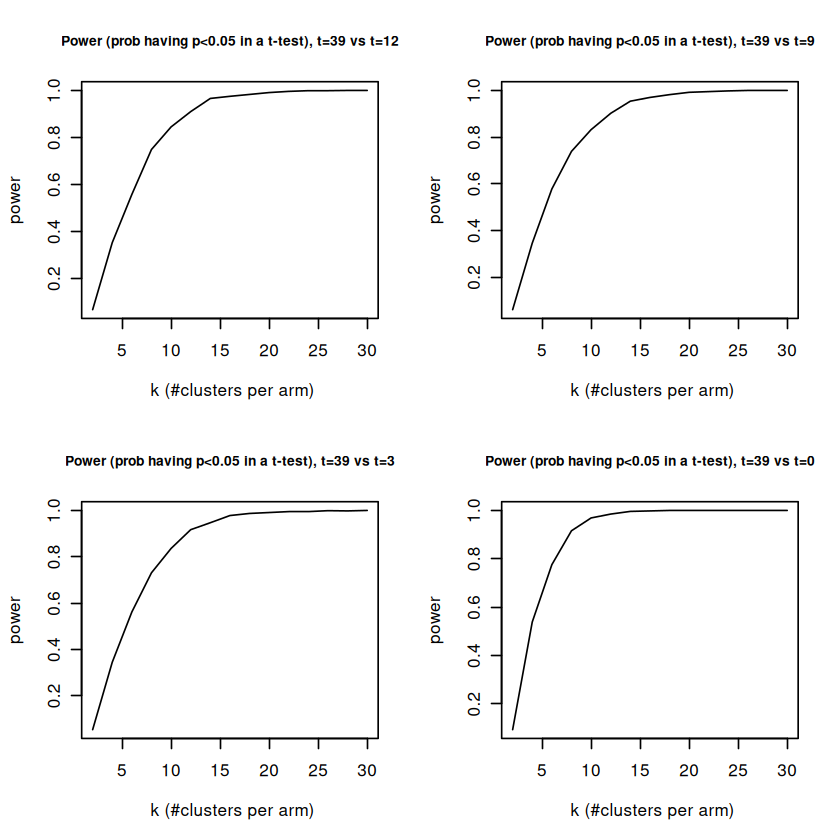

In [7]:
# PLOT
par(mfrow=c(2,2))
plot(n, result12, type='l', ylab='power', xlab=' k (#clusters per arm)', 
        main='Power (prob having p<0.05 in a t-test), t=39 vs t=12', cex.main=0.8)
plot(n, result9, type='l', ylab='power', xlab=' k (#clusters per arm)', 
        main='Power (prob having p<0.05 in a t-test), t=39 vs t=9', cex.main=0.8)
plot(n, result6, type='l', ylab='power', xlab=' k (#clusters per arm)', 
        main='Power (prob having p<0.05 in a t-test), t=39 vs t=3', cex.main=0.8)
plot(n, result3, type='l', ylab='power', xlab=' k (#clusters per arm)', 
        main='Power (prob having p<0.05 in a t-test), t=39 vs t=0', cex.main=0.8)

In [ ]:
# SAVE AS PDF
pdf("../outputs/combined_plots/power_sample.pdf", width = 7, height = 7)  # 调整宽高


plot(n, result12, type = "l", col = 1, lty = 1, lwd = 2,
     cex.lab=1.2,
     ylab = "Power", xlab = "Sample Size k (#clusters per arm)",
     ylim = c(0, 1))

lines(n, result9,  col = 2, lty = 1, lwd = 2)
lines(n, result6,  col = 3, lty = 1, lwd = 2)
lines(n, result3,  col = 4, lty = 1, lwd = 2)

grid(col = "grey70", lty = "dotted")

abline(h = 0.8, col = "red", lty = 2, lwd = 1.5)
text(x = max(n), y = 0.82, labels = "P = 0.8", pos = 2, col = "red", cex = 1)

legend("bottomright",
       legend = c(expression(t[2]==12),
                  expression(t[2]==9),
                  expression(t[2]==3),
                  expression(t[2]==0)),
       col = 1:4, lty = 1, lwd = 2, cex = 1.2,
       bty = "o", 
       bg = "white") 


dev.off()

pdf 
  2